In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


# **US Accidents 2016 - 2021 Exploratory Data Analysis**

Dataset Source: Kaggle

Dataset_Name: US_car_accidents_2016-2021

Source_link: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Size 1.5GB

Description:
This dataset contains the number of accidents occured in 49 states of the US. 
This dataset has been collected in real-time, using multiple Traffic APIs from February 2016 to Dec 2021, that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

Step 1: Download the Data

Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [3]:
data_filename= './us-accidents/US_Accidents_Dec21_updated.csv'

Dataset abbrevations:
1-ID - This is a unique identifier of the accident record.

2-Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

3-Start_Time - Shows start time of the accident in local time zone.

4-End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow

5-Start_Lat - Shows latitude in GPS coordinate of the start point.

6-Start_Lng - Shows longitude in GPS coordinate of the start point.

7-End_Lat - Shows latitude in GPS coordinate of the end point.

8-End_Lng - Shows longitude in GPS coordinate of the end point.

9-Distance(mi) - The length of the road extent affected by the accident.

10-Description - Shows natural language description of the accident.

11-Number - Shows the street number in address record.

12-Street - Shows the street name in address record.

13-Side - Shows the relative side of the street (Right/Left) in address record.

14-City - Shows the city in address record.

15-County - Shows the county in address record.

16-State - Shows the state in address record.

17-Zipcode - Shows the zipcode in address record.

18-Country - Shows the country in address record.

19-Timezone - Shows timezone based on the location of the accident (eastern, central, etc.).

20-Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.

21-Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).

22-Temperature(F) - Shows the temperature (in Fahrenheit).

23-Wind_Chill(F) - Shows the wind chill (in Fahrenheit).

24-Humidity(%) - Shows the humidity (in percentage).

25-Pressure(in) - Shows the air pressure (in inches).

26-Visibility(mi) - Shows visibility (in miles).

27-Wind_Direction - Shows wind direction.

28-Wind_Speed(mph) - Shows wind speed (in miles per hour).

29-Precipitation(in) - Shows precipitation amount in inches, if there is any.

30-Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

31-Amenity - A POI annotation which indicates presence of amenity in a nearby location.

32-Bump - A POI annotation which indicates presence of speed bump or hump in a nearby location.

33-Crossing - A POI annotation which indicates presence of crossing in a nearby location.

34-Give_Way - A POI annotation which indicates presence of give_way in a nearby location.

35-Junction - A POI annotation which indicates presence of junction in a nearby location.

36-No_Exit - A POI annotation which indicates presence of junction in a nearby location.

37-Railway - A POI annotation which indicates presence of railway in a nearby location.

38-Roundabout - A POI annotation which indicates presence of roundabout in a nearby location.

39-Station - A POI annotation which indicates presence of station in a nearby location.

40-Stop - A POI annotation which indicates presence of stop in a nearby location.

41-Traffic_Calming - A POI annotation which indicates presence of traffic_calming in a nearby location.

42-Traffic_Signal - A POI annotation which indicates presence of traffic_signal in a nearby location.

43-Turning_Loop - A POI annotation which indicates presence of turning_loop in a nearby location.

44-Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.

45-Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.

46-Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.

47-Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.

Step 2: Data Preparation and Cleaning

Load the file using Pandas
Look at some information about the data and the columns
Fix the missing or incorrect values

In [4]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')

In [5]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [6]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
len(df.columns)

47

In [9]:
total_state = df.groupby(['State']).size().reset_index(name='count')   #Total number of States and their accident count
total_state

,State,count
0,AL,19322
1,AR,10935
2,AZ,56504
3,CA,795868
4,CO,25340
5,CT,29762
6,DC,9133
7,DE,4842
8,FL,401388
9,GA,40086


Statistical Information/ Numeric Data

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [11]:
# get the columns from dataset that have numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)    #we have 14 numeric columns in the dataset

14

In [12]:
numeric_df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


In [13]:
# Find missing values in dataset Percentage wise
missing_percentages = df.isna().sum().sort_values(ascending = False)/ len(df) * 100 
missing_percentages

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [14]:
missing_percentages[missing_percentages!=0] 

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

<AxesSubplot:>

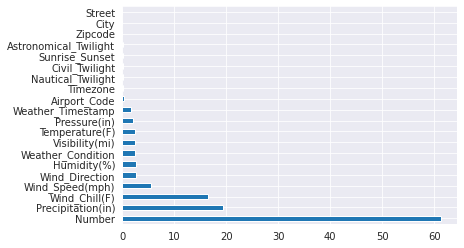

In [15]:
missing_percentages[missing_percentages!=0].plot(kind = 'barh')
                                                

Step 3: Exploratory Analysis and Data Visualization

Columns Analysed:

1. City
2. States
3. Start Time - Weeks, Months and Years
4. Start Lat, Start Lng
5. Weather Condition
6. Severity
7. Street
8. TimeZone

1. City Wise Analysis

In [16]:
cities = df.City.unique()
len(cities)

11682

In [17]:
cities[:100]   #100 City Names

array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', 'Anderson', 

Que. Top 20 Cities with highest accident rate.

In [18]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

Miami has the maximum count of accidents 106966 

<AxesSubplot:>

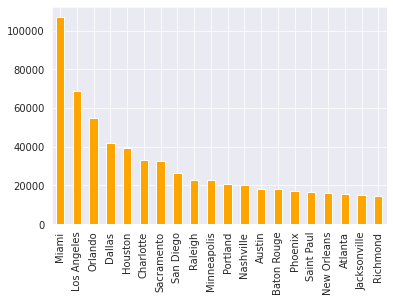

In [19]:
cities_by_accidents[:20].plot(kind = 'bar', fontsize = 10, color = 'orange')

2. State Wise Analysis

Que. Top 20 States with highest accident rates.

In [20]:
states_by_accidents = df.State.value_counts()
states_by_accidents[:20]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
Name: State, dtype: int64

California State has the maximum number of accident counts of 795868

<AxesSubplot:>

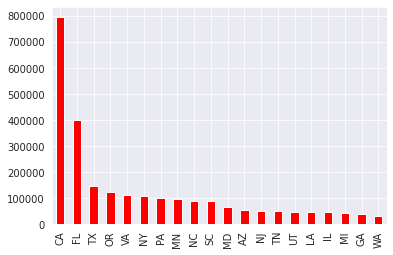

In [21]:
states_by_accidents[:20].plot(kind = 'bar', color = 'red')

<AxesSubplot:xlabel='City', ylabel='Count'>

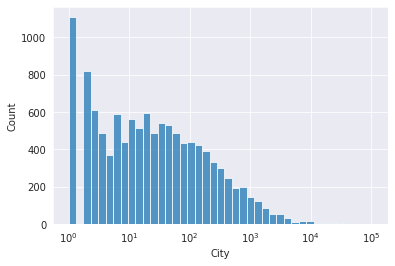

In [22]:
sns.histplot(cities_by_accidents, log_scale = True)

The above visual represents that there are maximum cities with only one accident.

In [23]:
cities_by_accidents[cities_by_accidents == 1]  

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

Over 1100 Cities have reported only 1 accident (This needs some investigation to verify consistency of data)

In [24]:
high_accidents_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accidents_cities = cities_by_accidents[cities_by_accidents < 1000]

* DistPlot of Cities with Low accident rate

In [25]:
len(low_accidents_cities)/ len (cities) *100

95.74559150830338

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

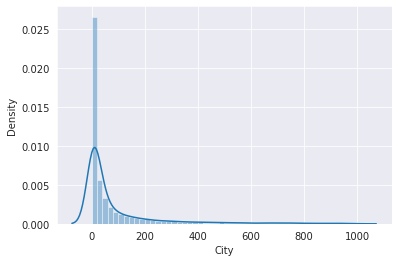

In [26]:
sns.distplot(low_accidents_cities)

* DistPlot of Cities with High accident rate

In [27]:
len(high_accidents_cities)/ len (cities) *100

4.245848313644924

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

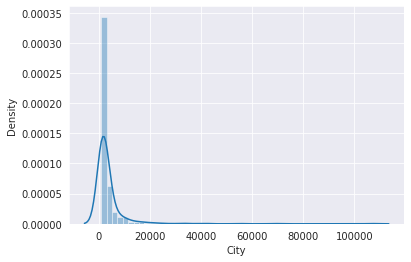

In [28]:
sns.distplot(high_accidents_cities)

95.74% of Cities have low accident rate while 4.24% of Cities have higher accident rate. So, Most of the Cities has less number of Accidents.

3. Based On Start Time

In [29]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [30]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

a. Daily Basis Analysis

Que. What time of the day are accidents most frequent in?

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

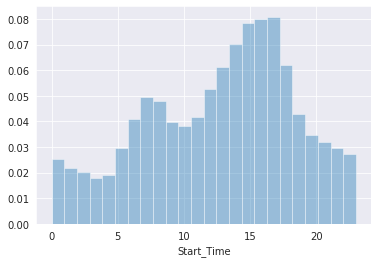

In [31]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist= True)

Maximum road accidents took place between 3 PM and 6 PM:
The main reason for most accidents taking place between 3 PM and 6 PM could be probably because of the people driving their vehicles carelessly and recklessly due to thin vehicular traffic during these hours.

5 PM is the most deadliest hour for accidents

b. Weekly Basis Analysis frequent for accidents

Que. What is the frequency of accidents in a week?

<AxesSubplot:xlabel='Start_Time'>

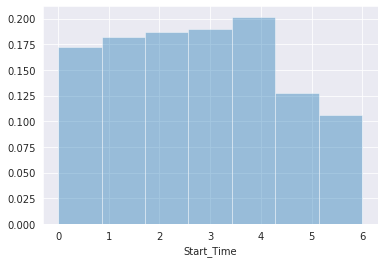

In [32]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist= True)

Probability of Accident rate is lower on weekends and more on weekdays

Friday has the most accident cases among all weekdays

Que. Is the Distribution of accidents by hour the same on weekends as on weekdays.

<AxesSubplot:xlabel='Start_Time'>

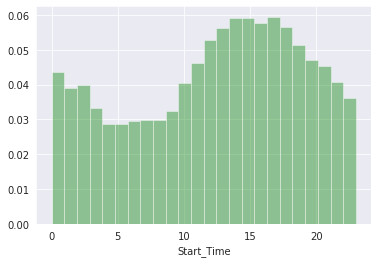

In [33]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde = False, norm_hist= True, color = 'g')

<AxesSubplot:xlabel='Start_Time'>

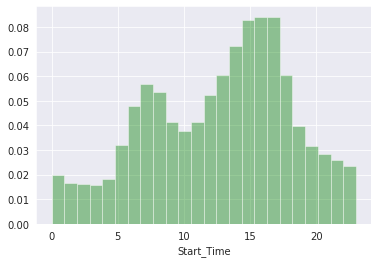

In [34]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins = 24, kde = False, norm_hist= True, color = 'g')

<AxesSubplot:xlabel='Start_Time'>

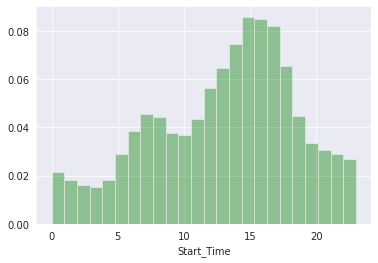

In [35]:
friday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 4]
sns.distplot(friday_start_time.dt.hour, bins = 24, kde = False, norm_hist= True, color = 'g')

Comparing the graphs of Weekend (Sunday) and Weekdays (Monday & Friday), we can conclude that probability of accident rate is similar - high during 2 PM to 5 PM.


c. Monthly Basis Analysis frequent for accidents

Que. Which months have the most accidents?

<AxesSubplot:xlabel='Start_Time'>

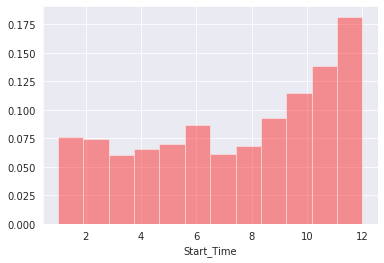

In [36]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True, color = 'r')

The Month of December has highest accident rate among all.
This higher volume of car accidents in November and December can be attributed to several reasons: Day Light Savings Time Some studies have shown that time changes that happen with Day Light Saving Time increase the risk of accidentsas people adjust to new sleep cycles.

Que. Explain month-wise trend of accidents for all the years from 2016 to 2020

<AxesSubplot:xlabel='Start_Time'>

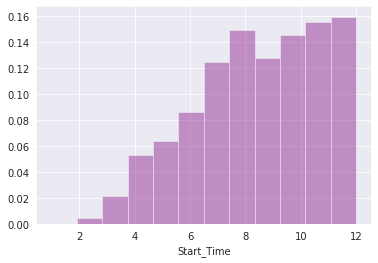

In [37]:
#for year 2016: 
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True, color = 'purple')

<AxesSubplot:xlabel='Start_Time'>

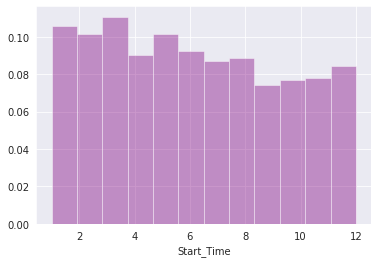

In [38]:
#for year 2017: 
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True, color = 'purple')

<AxesSubplot:xlabel='Start_Time'>

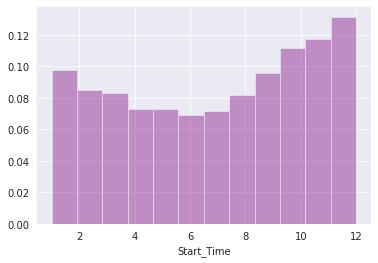

In [39]:
#for year 2018: 
df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True, color = 'purple')

<AxesSubplot:xlabel='Start_Time'>

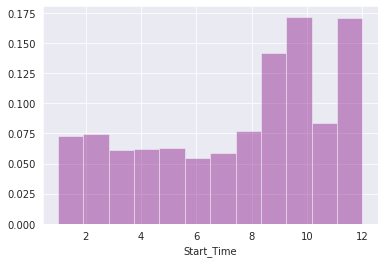

In [40]:
#for year 2019: 
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True, color = 'purple')

<AxesSubplot:xlabel='Start_Time'>

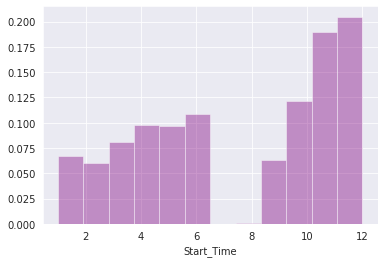

In [41]:
#for year 2020: 
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins = 12, kde = False, norm_hist= True, color = 'purple')

It seems that much data for year 2020 is missing as it could be inconsistent

d. Yearly Basis Analysis frequent for accidents

Que. Which year had the most number of accident cases?

In [42]:
year_max_acc=df.Start_Time.dt.year.value_counts()
year_max_acc

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

Year 2021 has the most highest count of accidents i.e 1511745

Que. What is the trend of accidents year over year? (increasing / decreasing)?

Text(0, 0.5, 'No. of accidents')

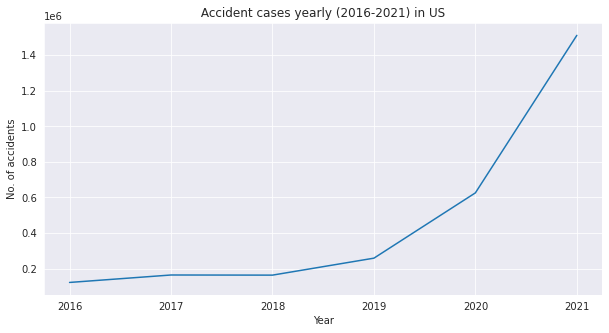

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(data = year_max_acc)
plt.title(" Accident cases yearly (2016-2021) in US ",size=12)
plt.xlabel('Year')
plt.ylabel('No. of accidents')

The trend of accident rates year on year basis is increasing.


4. Start Latitute and Longitude

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

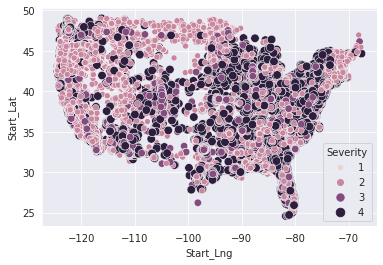

In [44]:
sample_df = df.sample(int(0.1 * len(df)))                                   #reduced the Point size to 0.001
sns.scatterplot(x = sample_df.Start_Lng, y = sample_df.Start_Lat, size=df.Severity, hue=df.Severity)

In [45]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
import folium                                                 #This library is used to plot a map
from folium.plugins import HeatMap

In [47]:
lat_long_combine= list(zip(list(df.Start_Lat), list(df.Start_Lng)))

In [48]:
map= folium.Map()
HeatMap(lat_long_combine[:2000]).add_to(map)                 #plotted upto 2000 count of accidents on a Map using folium
map

5. Based on Weather Condition

Que. Is there any effect of Weather on accidents?

In [49]:
Weather_Condition_aff = df.Weather_Condition.value_counts()
Weather_Condition_aff.head(10)

Fair                1107194
Mostly Cloudy        363959
Cloudy               348767
Partly Cloudy        249939
Clear                173823
Light Rain           128403
Overcast              84882
Scattered Clouds      45132
Light Snow            43752
Fog                   41226
Name: Weather_Condition, dtype: int64

<AxesSubplot:>

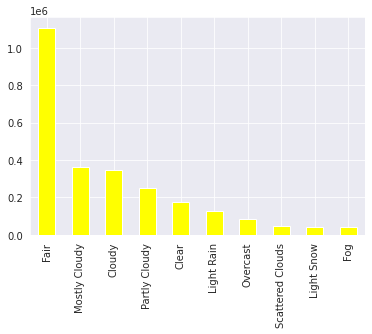

In [50]:
Weather_Condition_aff.head(10).plot(kind = 'bar', color = 'yellow')

1107194 Accidents were caused when the weather was Fair (clear), hence weather cannot be the cause of accidents occured.

6. Based on Severity 

Que. Which Severity of accidents occured the most?

<AxesSubplot:>

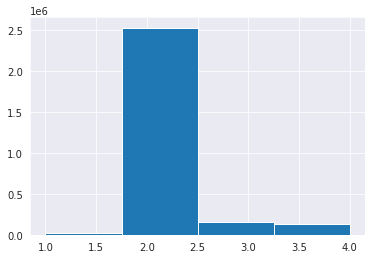

In [51]:
df.Severity.hist(bins=4)

The Graph clearly indicates that 2 nd type of severity is caused highest among all.

7. Street Wise Analysis for frequent Accidents

Which street had most accident in US?

In [52]:
streets = df.Street.value_counts()
streets_top = streets.head(10)
streets_top

I-95 N     39853
I-5 N      39402
I-95 S     36425
I-5 S      30229
I-10 E     26164
I-10 W     25298
I-80 W     17545
I-80 E     16873
I-405 N    13708
I-15 N     12675
Name: Street, dtype: int64

I-95 N  street has caused the highest count of accidents i.e 39853

Text(0, 0.5, 'No. of accidents')

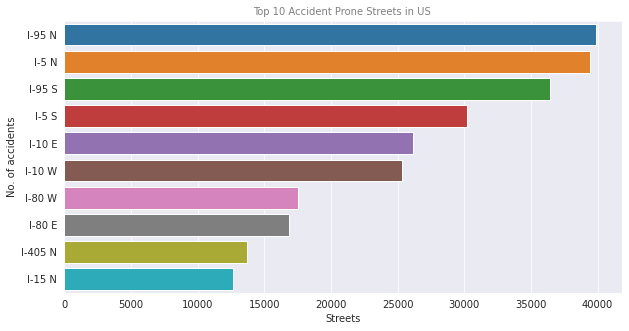

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(y=streets_top.index, x=streets_top)
plt.title("Top 10 Accident Prone Streets in US ",size=10,color="grey")
plt.xlabel('Streets')
plt.ylabel('No. of accidents')

8. Time Zone Wise Analysis

Que. Which timezone reported the most number of accident cases?

In [54]:
timezone_acc=df['Timezone'].value_counts()
timezone_acc

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64

US/Eastern has caused the highest count of accidents i.e 1221927

<AxesSubplot:title={'center':'US Timezone wise accident counts'}, ylabel='Timezone'>

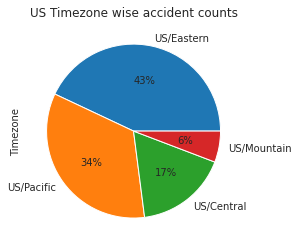

In [55]:
timezone_acc.plot(kind = 'pie', autopct='%1.0f%%', title='US Timezone wise accident counts' )

Step 4: Report Analysis

Overall Insights :

- Miami has the maximum count of accidents 106966
- California State has the maximum number of accident counts of 795868
- 95.74% of Cities have low accident rate while 4.24% of Cities have higher accident rate. So, Most of the Cities has less number of Accidents.
- Over 1100 Cities have reported only 1 accident (This needs some investigation for accuracy of data)
- Maximum road accidents took place between 3 PM and 6 PM on both weekdays and weekends.
- Weather is clearly not a cause of accidents that occured in US as most of the time weather was clear and fair.
- Year 2021 had maximum number of accidents i.e 1511745
- I-95 N street has caused the highest count of accidents i.e 39853
- US/Eastern has caused the highest count of accidents i.e 1221927
- There is sharp incline after 2020 which led to higher accident rates in 2021.
- Trend of accident rate year on year basis is exponentially increasing.
- 2nd type of Severity of accident is caused the highest.

 Step 5: Areas of Additional research - 
1. To validate the reason - why California has comparatively higher accident rates than New York despite of NY being the highest populated State in US. 
New York City, NY (Population: 8,622,357) while Los Angeles, CA (Population: 4,085,014) as of 2020
2. To re validate if Data of 2020 is complete or not as it seems to be inconsistent.
3. It clearly indicates that most of the accidents occured during Fair and clear weather which cannot be the reason for cause of    accidents, need to analyse the other factors that lead to the higher accident rates.
4. What could be the other lead causes for accidents and what projects needs to be implemented so that the accident rates can be reduced.